In [314]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import absolute
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
import seaborn as sns

%matplotlib inline

In [448]:
df=pd.read_csv(r'C:\Users\Cohan\Documents\שבתון צחי\Train_rev1.csv')

# Data Exploration

In [3]:
df.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244767 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        65442 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244767 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


In [5]:
#ContractTime

In [6]:
df['ContractTime'].value_counts()

permanent    151521
contract      29342
Name: ContractTime, dtype: int64

In [ ]:
#ContractTime

In [7]:
df['ContractType'].value_counts()

full_time    57538
part_time     7904
Name: ContractType, dtype: int64

<AxesSubplot:>

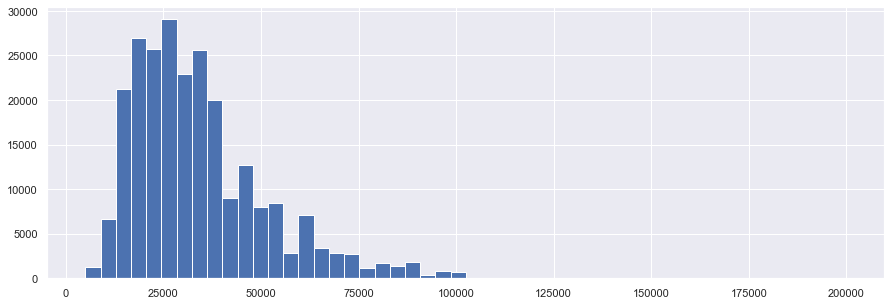

In [427]:
df['SalaryNormalized'].hist(bins=50,figsize=(15,5))

In [217]:
df['SalaryNormalized'].agg(['skew', 'kurtosis']).transpose()

skew        1.415502
kurtosis    3.071059
Name: SalaryNormalized, dtype: float64

ContractType  ContractTime
full_time     contract        AxesSubplot(0.125,0.125;0.775x0.755)
              permanent       AxesSubplot(0.125,0.125;0.775x0.755)
              NaN             AxesSubplot(0.125,0.125;0.775x0.755)
part_time     contract        AxesSubplot(0.125,0.125;0.775x0.755)
              permanent       AxesSubplot(0.125,0.125;0.775x0.755)
              NaN             AxesSubplot(0.125,0.125;0.775x0.755)
NaN           contract        AxesSubplot(0.125,0.125;0.775x0.755)
              permanent       AxesSubplot(0.125,0.125;0.775x0.755)
              NaN             AxesSubplot(0.125,0.125;0.775x0.755)
Name: SalaryNormalized, dtype: object

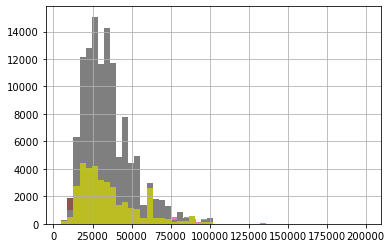

In [8]:
df.groupby(['ContractType','ContractTime'],dropna=False)['SalaryNormalized'].hist(bins=50)

In [9]:
df.groupby(['ContractType','ContractTime'],dropna=False)['SalaryNormalized'].median()

ContractType  ContractTime
full_time     contract        30720.0
              permanent       32500.0
              NaN             22000.0
part_time     contract        20160.0
              permanent       18453.0
              NaN             14400.0
NaN           contract        29760.0
              permanent       32500.0
              NaN             30000.0
Name: SalaryNormalized, dtype: float64

In [10]:
#Company

In [11]:
CompanyMeanSal=df.groupby('Company').SalaryNormalized.agg(['mean','count'])

<AxesSubplot:xlabel='count', ylabel='mean'>

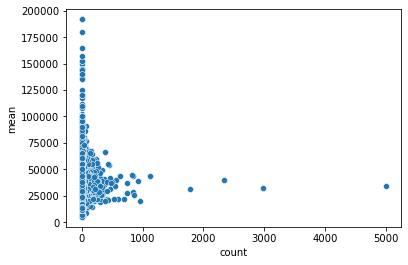

In [12]:
sns.scatterplot(x=CompanyMeanSal['count'], y=CompanyMeanSal['mean'])

In [ ]:
#Category

In [13]:
CategoryMeanSal=df.groupby('Category').SalaryNormalized.agg(['mean','count'])

<AxesSubplot:xlabel='count', ylabel='mean'>

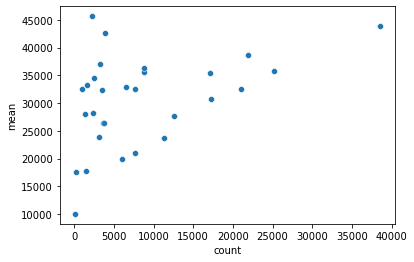

In [14]:
sns.scatterplot(x=CategoryMeanSal['count'], y=CategoryMeanSal['mean'])

In [15]:
sns.set(rc={'figure.figsize':(25,10)})

<AxesSubplot:xlabel='Category', ylabel='SalaryNormalized'>

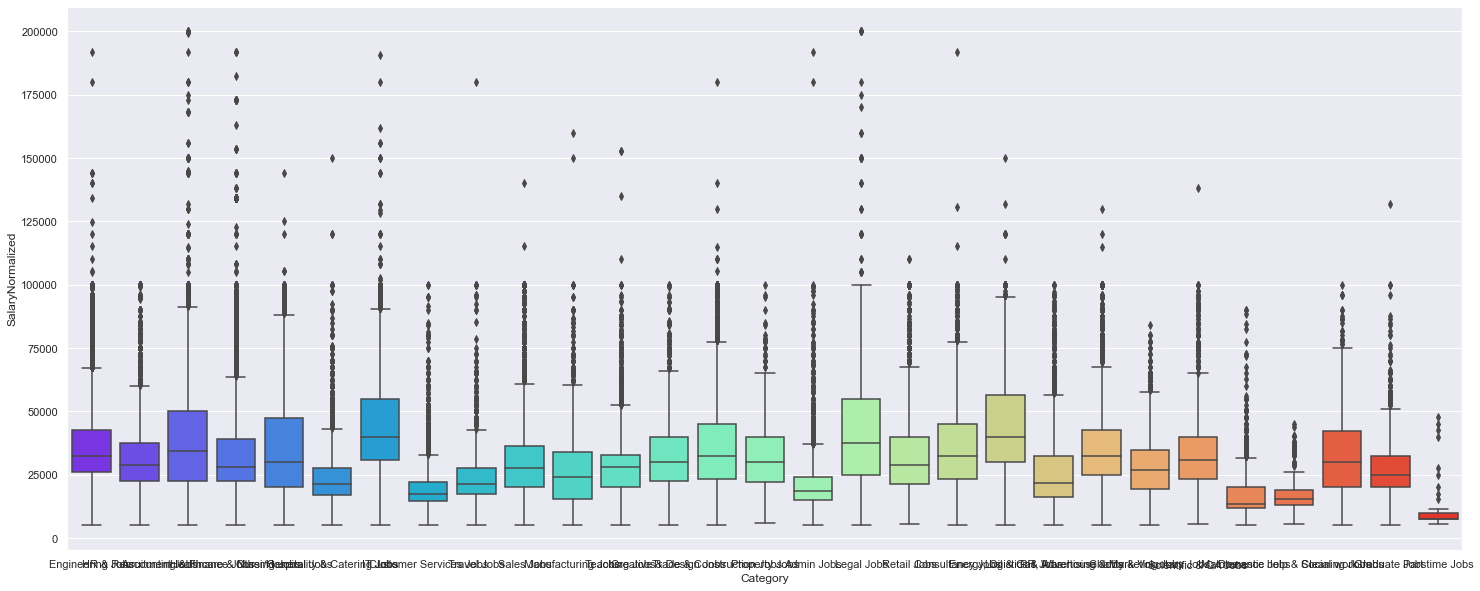

In [16]:
sns.boxplot(x='Category',y='SalaryNormalized',data=df,palette='rainbow')

In [ ]:
#Location

In [17]:
LocationMeanSal=df.groupby('LocationNormalized').SalaryNormalized.agg(['mean','count'])

<AxesSubplot:xlabel='count', ylabel='mean'>

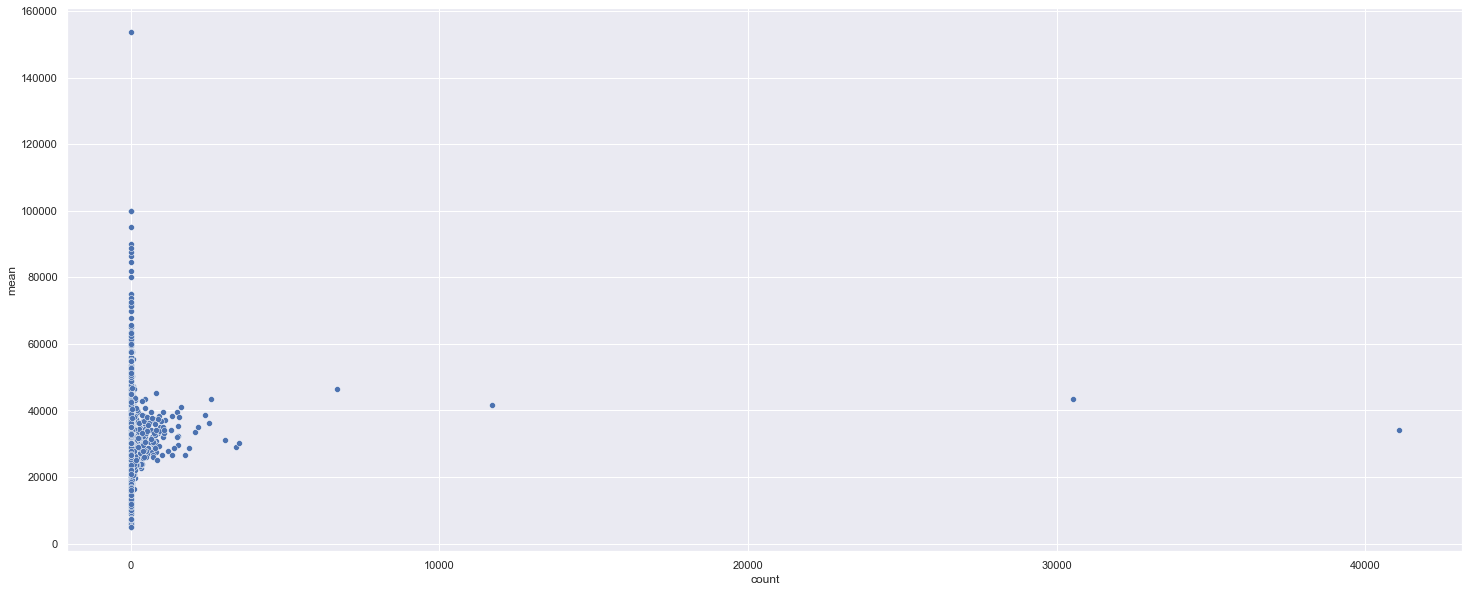

In [18]:
sns.scatterplot(x=LocationMeanSal['count'], y=LocationMeanSal['mean'])

# Preprocessing

In [ ]:
#dropping irrelevant data, 

In [449]:
#full_df=df[(df.Title.isnull()!=True)]
full_df=df[(df.Title.isnull()!=True) & (df.SalaryNormalized<=30000) & (df.SalaryNormalized>=25000)]
X=full_df.drop(['Id','FullDescription','LocationRaw','LocationNormalized','Company','SalaryRaw','SalaryNormalized','SourceName'],axis=1)
y=full_df['SalaryNormalized']
X.head()

,Title,ContractType,ContractTime,Category
0,Engineering Systems Analyst,NaN,permanent,Engineering Jobs
1,Stress Engineer Glasgow,NaN,permanent,Engineering Jobs
2,Modelling and simulation analyst,NaN,permanent,Engineering Jobs
3,Engineering Systems Analyst / Mathematical Mod...,NaN,permanent,Engineering Jobs
4,"Pioneer, Miser Engineering Systems Analyst",NaN,permanent,Engineering Jobs


In [450]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42050 entries, 0 to 244754
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         42050 non-null  object
 1   ContractType  10967 non-null  object
 2   ContractTime  32326 non-null  object
 3   Category      42050 non-null  object
dtypes: object(4)
memory usage: 1.6+ MB


In [22]:
#Completing ContractType and ContractTime from FullDescription

In [23]:
#desc=df[df["ContractType"].isnull()].FullDescription
#desc_part=(["parttime" in word.lower().split() for word in df.FullDescription])
#desc_full=pd.DataFrame(["fulltime" in word.lower().split() for word in df.FullDescription])

In [ ]:
#Spliting tha data

In [479]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [25]:
#Scaling the Salary vector (from right skewed to normally distributed)

In [480]:
y_train_df=pd.DataFrame(y_train)
y_valid_df=pd.DataFrame(y_valid)

array([[<AxesSubplot:title={'center':'SalaryNormalized'}>]], dtype=object)

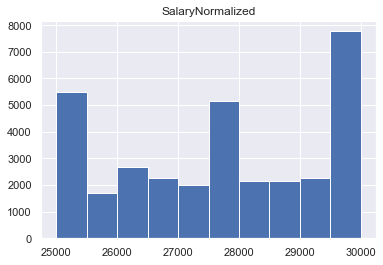

In [481]:
y_train_df.hist()

In [ ]:
#Quantile transform

In [482]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=1000, random_state=0)
y_train_qt=qt.fit_transform(y_train_df)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

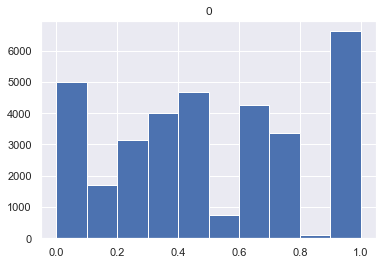

In [483]:
me=pd.DataFrame(y_train_qt)
me.hist(bins=10)

In [ ]:
#OneHot encoding to categorial cols

In [188]:
from sklearn.preprocessing import OneHotEncoder

In [484]:
#OH_cols=['ContractType','ContractTime','Category']
OH_cols=['ContractTime','Category']
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[OH_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[OH_cols]))

In [ ]:
#Target encoding

In [485]:
from category_encoders.target_encoder import TargetEncoder

In [486]:
Trgt_cols=['ContractType','ContractTime','Category']
TE_encoder = TargetEncoder()
Trgt_cols_train = TE_encoder.fit_transform(X_train[Trgt_cols], y_train)
Trgt_cols_valid = TE_encoder.transform(X_valid[Trgt_cols])

Trgt_cols_train.head()

C:\Users\Cohan\anaconda3\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\Cohan\anaconda3\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


,ContractType,ContractTime,Category
73102,27576.407430,27595.274948,27715.616120
164233,27576.407430,27595.274948,27563.744143
183278,27576.407430,27595.274948,27647.402999
14280,27576.407430,27595.274948,27519.480412
180050,27581.345145,27733.565826,27766.723490


In [148]:
#FullDescription preprocessing

In [457]:
import string
import nltk
#nltk.download() #Download the necessary datasets
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
   
ps = PorterStemmer()

In [32]:
#TFIDF

In [458]:
from sklearn.feature_extraction.text import CountVectorizer

In [487]:
def get_ngrams(text, ngram_from=2, ngram_to=2, n=None, max_features=20000):
    
    vec = CountVectorizer(ngram_range = (ngram_from, ngram_to), 
                          max_features = max_features, 
                          stop_words='english').fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, i]) for word, i in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
   
    return words_freq[:n]

In [488]:
bigrams = get_ngrams(X_train['Title'], ngram_from=2, ngram_to=2, n=15)
bigrams_df = pd.DataFrame(bigrams)
bigrams_df.columns=["Bigram", "Frequency"]
bigrams_df.head()

,Bigram,Frequency
0,sales executive,1132
1,account manager,796
2,recruitment consultant,694
3,staff nurse,573
4,business development,572


In [489]:
bow_transformer = CountVectorizer(ngram_range=(1,2),stop_words='english').fit(X_train['Title'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

36306


In [490]:
Titles_bow = bow_transformer.transform(X_train['Title'])

In [491]:
print('Shape of Sparse Matrix: ', Titles_bow.shape)
print('Amount of Non-Zero occurences: ', Titles_bow.nnz)

Shape of Sparse Matrix:  (33640, 36306)
Amount of Non-Zero occurences:  220142


In [492]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(Titles_bow)

In [493]:
Titles_train_tfidf = tfidf_transformer.transform(Titles_bow)
print(Titles_train_tfidf.shape)

(33640, 36306)


In [494]:
#processing the validation data the same way

In [495]:
valid_bow_transformer = CountVectorizer(ngram_range=(1,2),stop_words='english').fit(X_valid['Title'])
Titles_valid_bow = bow_transformer.transform(X_valid['Title'])
Titles_valid_tfidf = tfidf_transformer.transform(Titles_valid_bow)
print(Titles_valid_tfidf.shape)

(8410, 36306)


In [44]:
#Joining all the processed Data

In [496]:
print(OH_cols_train.shape)
print(OH_cols_valid.shape)

(33640, 32)
(8410, 32)


In [497]:
from scipy import sparse

Train_OH_data = sparse.hstack((Titles_train_tfidf,OH_cols_train))
Valid_OH_data = sparse.hstack((Titles_valid_tfidf,OH_cols_valid))

In [498]:
print(Train_OH_data.shape)
print(Valid_OH_data.shape)

(33640, 36338)
(8410, 36338)


In [418]:
from scipy import sparse

Train_Trgt_data = sparse.hstack((Titles_train_tfidf,Trgt_cols_train))
Valid_Trgt_data = sparse.hstack((Titles_valid_tfidf,Trgt_cols_valid))

ValueError: blocks[0,:] has incompatible row dimensions. Got blocks[0,1].shape[0] == 2447, expected 30710.

# Modeling

In [268]:
from xgboost import XGBRegressor

In [500]:
my_model = XGBRegressor(n_estimators=1000,learning_rate=0.1,n_jobs=4)
my_model.fit(Train_OH_data, y_train,
             early_stopping_rounds=5, 
             eval_set=[(Valid_OH_data, y_valid)], 
             verbose=False)

C:\Users\Cohan\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=4, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [513]:
from sklearn.metrics import mean_squared_error

predictions = my_model.predict(Valid_OH_data)
dummy_pred=[27500 for Sal in y_valid]
print("Mean Absolute Error: " + str((mean_squared_error(predictions, y_valid))**0.5))
print("Mean Absolute Error: " + str((mean_squared_error(dummy_pred, y_valid))**0.5))

Mean Absolute Error: 1648.6070063407947
Mean Absolute Error: 1758.2206917651858


In [510]:
predictions[0:9]

array([27813.31 , 27704.752, 26809.443, 27454.719, 27344.885, 27104.738,
       28166.398, 27479.666, 27464.764], dtype=float32)

In [509]:
y_valid.head(10)

90120     27500
94565     30000
1011      28500
54806     25000
159388    30000
109416    25000
11048     30000
173195    27500
223952    25920
172792    25000
Name: SalaryNormalized, dtype: int64

In [502]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(my_model, Valid_OH_data, y_valid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
## convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 1445.791


In [472]:
from sklearn.metrics import mean_squared_error

predictions = my_model.predict(Titles_train_tfidf)
# invert transform on predictions
predictions_df=pd.DataFrame(predictions)
predictions_invrt = qt.inverse_transform(predictions_df)
print("Mean Absolute Error: " + str((mean_squared_error(predictions, y_train_qt))**0.5))
print("Mean Absolute Error: " + str((mean_squared_error(predictions_invrt, y_train))**0.5))

Mean Absolute Error: 0.2616650200479926
Mean Absolute Error: 1388.6535214875773


In [311]:
#Building a pipline
from sklearn.pipeline import Pipeline

# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', my_model)])


In [315]:
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, Train_OH_data, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: nan
